# Human Activity Recognition using TSFEL

On this example we will perform Human Activty Recognition using our library **Time Series Features Library**. 

The first step consists on importing the library. Press play. 

The import can take a few seconds, but the play button will change so that you know the import has started. Please, try to import just once.

In [0]:
#@title Import Time Series Features Library
!git clone https://github.com/TSFDlib/TSFEL.git >/dev/null 2>&1
!pip install --upgrade -q gspread >/dev/null 2>&1
!pip install gspread oauth2client >/dev/null 2>&1
!pip install pandas >/dev/null 2>&1
!pip install scipy >/dev/null 2>&1
!pip install novainstrumentation >/dev/null 2>&1
!pip install pandas_profiling >/dev/null 2>&1

To check if everything was correctly imported, access "Files" (on the left side of the screen) and see if it contains the folder "TSFEL". Otherwise, press "Refresh" or if necessary, import again.

---


#Dataset

The dataset we will be using is open-source. It is provided by UCI and it was performed by 30 volunteers using a smartphone on the waist. It contains 6 activities: 

*   Walking
*   Standing
*   Sitting
*   Laying
*   Upstairs
*   Downstairs

To access this dataset click [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00240/) and dowload the zip "UCI_HAR_Dataset". Now, unzip the folder and upload to "Files" the following txt:

*   total_acc_x_test.txt
*   total_acc_y_test.txt
*   total_acc_z_test.txt
*   total_acc_x_train.txt
*   total_acc_y_train.txt
*   total_acc_z_train.txt
*   y_test.txt
*   y_train.txt





In [0]:
#@title Data Preparation
# Import libraries
import pandas as pd
import numpy as np
import TSFEL as tslib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load data
train_sig = np.loadtxt('total_acc_x_train.txt', dtype='float32')
test_sig = np.loadtxt('total_acc_x_test.txt', dtype='float32')
y_test = np.loadtxt('y_test.txt', dtype='float32')
y_train = np.loadtxt('y_train.txt', dtype='float32')
labels = np.array(pd.read_csv('activity_labels.txt', header=None, delimiter=' '))[:,1]

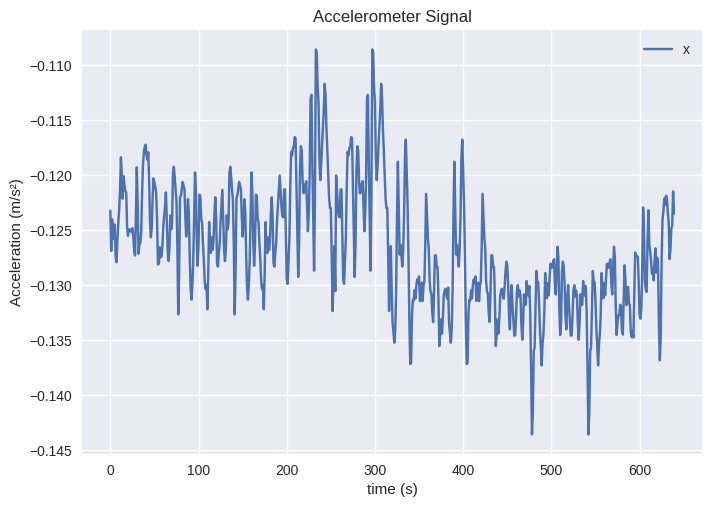

In [0]:
#@Signal Preview
plt.figure()
plt.plot(np.concatenate(train_sig[0:5]))
plt.xlabel("time (s)")
plt.ylabel("Acceleration (m/s²)")
plt.title("Accelerometer Signal")
plt.legend('x axis')
plt.show()

#Feature Extraction

The features to extract are defined in the [google sheet](https://docs.google.com/spreadsheets/d/15Db3m7if7xkZBqHDUXtFxrwIcBqKvIBU0XnV6aKa4SI/edit?ts=5bd1eca0#gid=0).
A feature report is saved in /utils.


In [0]:
#@title Feature Extraction

# Extract excel info
cfg_file = tslib.extract_sheet()

# Get features
X_train = tslib.extract_features(train_sig, cfg_file, segment=False)
X_test = tslib.extract_features(test_sig, cfg_file, segment=False)

# Feature Selection

In [13]:
features = pd.concat([X_train,X_test])

features = tslib.correlation_report(features)

X_train = features[:len(X_train)]
X_test = features[len(X_train):]

AttributeError: ignored

In [0]:
#@title Preview Features


#Classification

In this example the classification is performed with a [Decision Tree](https://scikit-learn.org/stable/modules/tree.html) classifier.
  

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score


classifier = DecisionTreeClassifier()

# Train the classifier
classifier.fit(X_train, y_train.ravel())

# Predict test data
y_test_predict = classifier.predict(X_test)

# Get the classification accuracy
accuracy = accuracy_score(y_test, y_test_predict)
print("Accuracy: " + str(accuracy) + '%')

Accuracy: 0.6114692908042076%


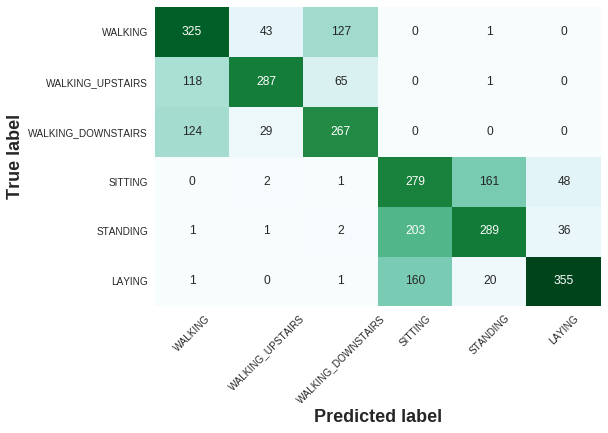

In [7]:
cm = confusion_matrix(y_test, y_test_predict)
df_cm = pd.DataFrame(cm, index=[i for i in labels], columns=[i for i in labels])
plt.figure()
ax = sns.heatmap(df_cm,  cbar = False, cmap="BuGn", annot=True, fmt="d")
plt.setp(ax.get_xticklabels(), rotation=45)
plt.ylabel('True label', fontweight='bold', fontsize = 18)
plt.xlabel('Predicted label', fontweight='bold', fontsize = 18)
plt.show()


array(['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING',
       'STANDING', 'LAYING'], dtype=object)